<a href="https://colab.research.google.com/github/LaskinM/StatPrak25/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least 5 results confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the pandas library.




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flights = pd.read_csv('flights.csv', low_memory = False)
flights = flights[flights['ORIGIN_AIRPORT'].str.len() == 3]
p1 = ~flights["ORIGIN_AIRPORT"].str.isdigit()
p2 = ~flights["DESTINATION_AIRPORT"].str.isdigit()

flights = flights[p1 & p2]
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
airlines = pd.read_csv('airlines.csv', low_memory = False)
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [3]:
airports = pd.read_csv('airports.csv', low_memory = False)
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


**1. Исследуем среднюю задержку рейсов для каждой авиакомпании**


AIRLINE
NK    16.683317
UA    15.131718
F9    14.267977
B6    11.828654
WN    10.995318
MQ    10.685483
AA     9.330882
VX     9.211211
EV     9.076964
OO     8.181225
DL     7.763099
US     6.141137
AS     1.957637
HA     0.514001
Name: DEPARTURE_DELAY, dtype: float64


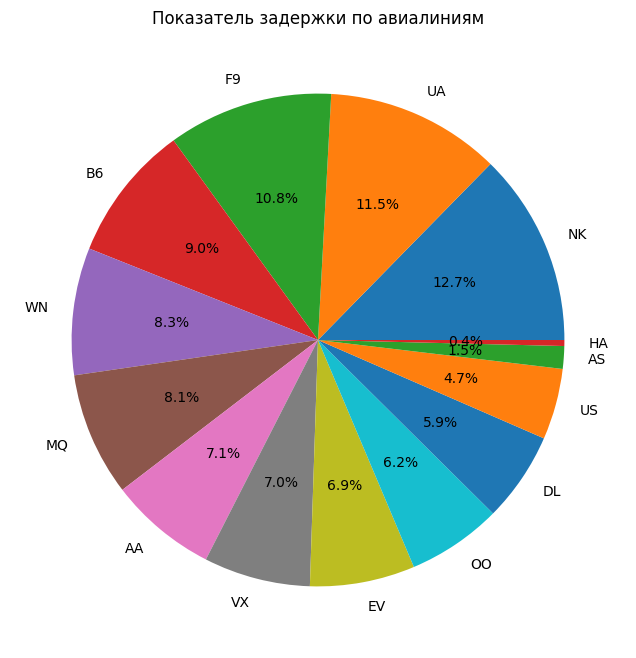

In [4]:
air = flights.groupby('AIRLINE')['DEPARTURE_DELAY'].mean()
air.sort_values(ascending = False, inplace = True)

print(air)

plt.figure(figsize = (12, 8))
plt.pie(air.values, labels = air.index, autopct = '%1.1f%%')
plt.title('Показатель задержки по авиалиниям')
plt.show()

Так мы можем понять, у каких авиакомпаний наибольшая задержка рейсов - возможно, на их самолетах работники не всегда справляются с проверкой состояние перед вылетом. Если проблема в работе персонала, то мы можем выявить это, а если дело в разнице между моделями самолетов, то можем предоставить некоторым авиакомпаниям больший буфер перед вылетом.

Пассажиры же могут узнать, какие авиакомпании лучше выбирать, если время прилета очень важно и задержка недопустима.

**2. Посмотрим на среднюю задержку вылета за день в зависимости от аэропорта**

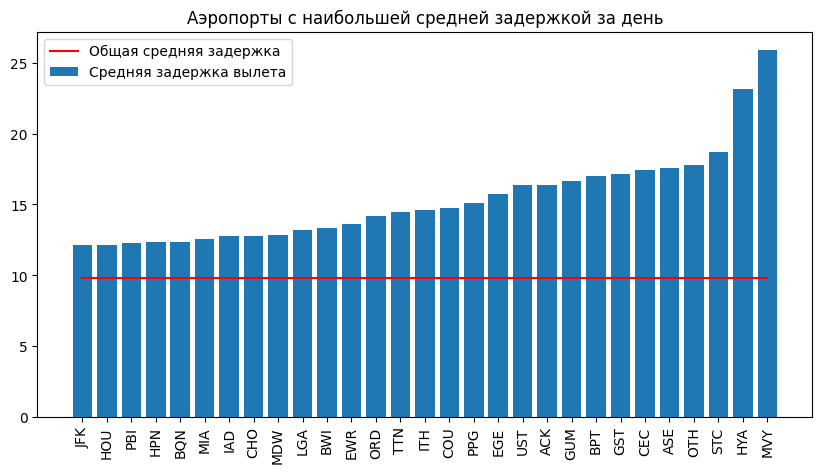

In [11]:
delay_by_day = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values().reset_index().iloc[-30:-1]
plt.figure(figsize = (10, 5))
plt.title("Аэропорты с наибольшей средней задержкой за день")
plt.xticks(rotation=90)
plt.bar(delay_by_day['ORIGIN_AIRPORT'], delay_by_day['DEPARTURE_DELAY'], label = "Средняя задержка вылета")
plt.plot(delay_by_day['ORIGIN_AIRPORT'], np.full((29,), flights['DEPARTURE_DELAY'].mean()), color = 'red', label = "Общая средняя задержка")
plt.legend(loc='best')
plt.show()

Выводы: для аэропортов с наибольшей задержкой можем задуматься о проверке логистики наземного обслуживания (заправка, уборка, погрузка багажа) и сравнении качества инфраструкутуры (возможно, просто не хватает полос или терминалов).

Пассажирам: опять же, стараемся не выбирать аэропорты с большой задержкой, если летим на важную встречу.

**3. Исследуем зависимость средней задержки вылета в зависимости от месяца**



Средняя задержка вылета по месяцам:
MONTH
1      9.759471
2     11.885284
3      9.660903
4      7.721885
5      9.454144
6     13.986016
7     11.394664
8      9.932045
9      4.823560
11     6.944197
12    11.783529
Name: DEPARTURE_DELAY, dtype: float64


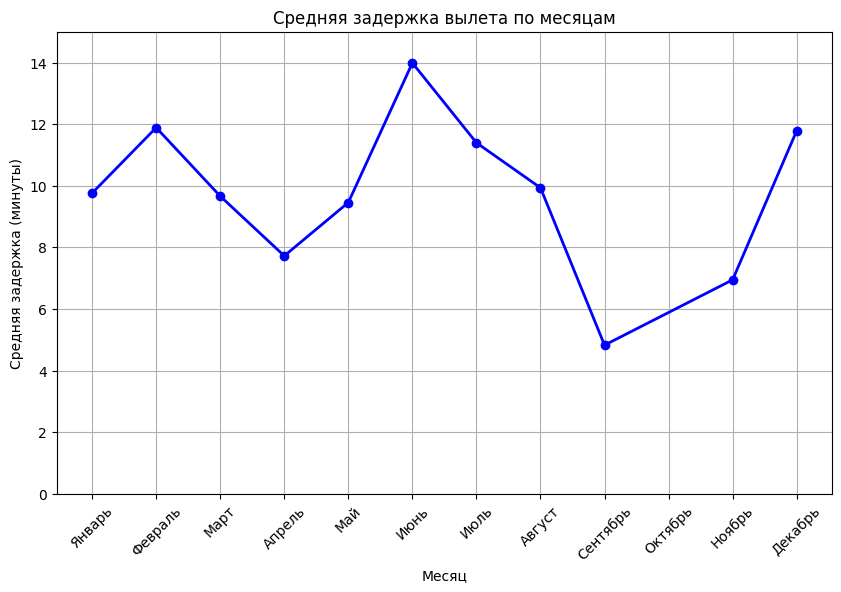

In [12]:
# Группировка по месяцам и расчет средней задержки вылета
delay_by_month = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()
print("\nСредняя задержка вылета по месяцам:")
print(delay_by_month)

# Создаем список с названиями месяцев для подписей на графике
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(delay_by_month.index, delay_by_month.values, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Средняя задержка вылета по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(range(1, 13), months, rotation=45)
plt.ylim(0, 15)
plt.grid(True)
plt.show()

Выводы: аэропортам можем предложить увеличить штат наземных служб в пиковые месяцы и переносить плановое ТО на месяцы с низкой загрузкой, а так же корректировать время между вылетами в зависимости от времени года.

Авиакомпании могут вводить бонусы (мили, ваучеры) за перелёты в «сложные» месяцы, заранее предупреждать о возможных задержках при бронировании.

**4. Посмотрим на штаты с точки зрения количества расположенных аэропортов и их среднюю задержку вылетов.**

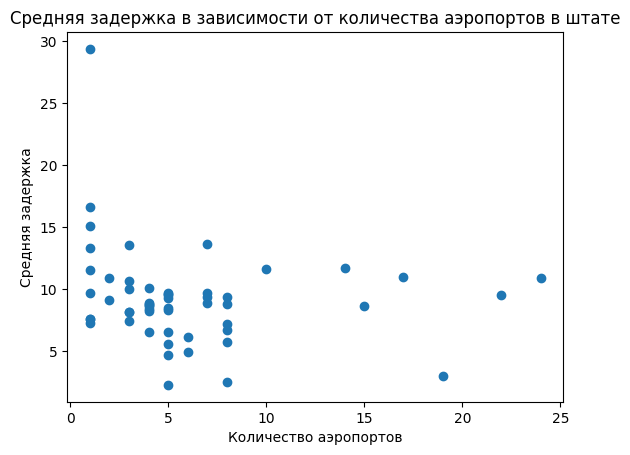

In [14]:
orig = pd.merge(
  airports, flights,
  left_on="IATA_CODE", right_on="ORIGIN_AIRPORT",
  how="inner"
)
dest = pd.merge(
  airports, flights,
  left_on="IATA_CODE", right_on="DESTINATION_AIRPORT",
  how="inner"
)
#Хотим, чтобы график визуализировал связь между количеством аэропортов в каждом штате и средней задержкой вылетов
airports_count = airports.groupby("STATE")["IATA_CODE"].count()
mean_delay = orig.groupby("STATE")["DEPARTURE_DELAY"].mean()
plt.scatter(airports_count, mean_delay)
plt.title("Средняя задержка в зависимости от количества аэропортов в штате")
plt.xlabel("Количество аэропортов")
plt.ylabel("Средняя задержка")
plt.show()

Понятно, что многое зависит от населения штата, но некоторым штатам точно есть смысл задуматься об инвестировании в новые аэропорты или о создании резервных планов (использование военных аэродромов).

Авиакомпании могут задуматься о размещении "главных" аэропортов в малозагруженных штатах - будет легче перенаправить рейс при необходимости.

**5. Исследуем среднюю задержку вылета в зависимости от времени суток**

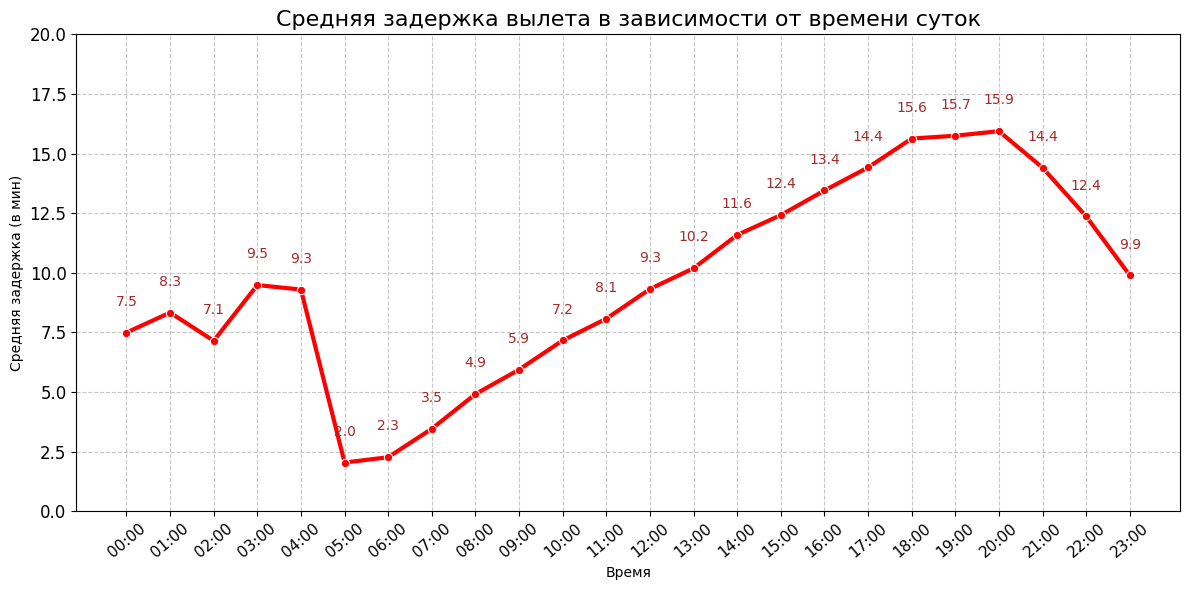

In [17]:
flights['HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100

dh = flights.groupby('HOUR')['DEPARTURE_DELAY'].mean()

plt.figure(figsize = (12, 6))
sns.lineplot(x = dh.index, y = dh.values, marker = 'o', color = 'red', linewidth = 3)

for hour, delay in zip(dh.index, dh.values):
    plt.text(hour, delay + 1, f'{delay:.1f}', ha = 'center', va = 'bottom', fontsize = 10, color = 'brown')

plt.title('Средняя задержка вылета в зависимости от времени суток', fontsize = 16)
plt.xlabel('Время')
plt.ylabel('Средняя задержка (в мин)')
plt.xticks(range(24), [f'{x:02d}:00' for x in range(24)], rotation = 40, fontsize = 11)
plt.yticks(fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

Выводы: аэропортам следует перенести все плановые вреверки на раннее утро, увеличить количество сотрудников на пиковые часы и открывать дополнительные стойки регистрации в это время.

Авиакомпаниям есть смысл увеличить количество утренних вылетов, направить дополнительные экипады и технику на дневные смены